In [187]:
import requests
import pandas as pd
import numpy as np
import tweepy
from io import StringIO

# 1. Gathering

## 1a. Import WeRateDogs Twitter archive as file on hand

In [188]:
df_twit = pd.read_csv('twitter-archive-enhanced.csv')

In [189]:
df_twit.shape

(2356, 17)

In [190]:
df_twit.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


## 1b. Get Image Predictions from URL

In [191]:
r = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
print(r.status_code)
print(r.headers['content-type'])
print(r.encoding)

200
text/tab-separated-values; charset=utf-8
utf-8


In [192]:
df_pred = pd.read_csv(StringIO(r.text), dtype=str, sep='\t')

In [193]:
df_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.0614285,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.07419169999999999,True,Rhodesian_ridgeback,0.07201,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.13858399999999998,True,bloodhound,0.11619700000000001,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


## 1c. Get each tweet's retweet count and favorite ("like") count, and any additional interesting data

In [194]:
import json
d = []
with open('tweet-json.txt', 'r') as f:
    for line in f:
        try:
            linej = json.loads(line)
            d.append({
                'id_str': linej['id_str'],
                'retweet_count': linej['retweet_count'],
                'favourite_count': linej['favorite_count']
            })
        except:
            print(line)
df_tweet = pd.DataFrame(d)

In [195]:
df_tweet.head()

,favourite_count,id_str,retweet_count
0,39467,892420643555336193,8853
1,33819,892177421306343426,6514
2,25461,891815181378084864,4328
3,42908,891689557279858688,8964
4,41048,891327558926688256,9774


# 2. Assess

2a. Assess WeRateDogs Twitter archive

In [196]:
df_twit.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
791,773704687002451968,NaN,NaN,2016-09-08 02:09:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Loki. He knows he's adorable. One ear ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/773704687...,12,10,Loki,None,None,None,None
2178,669015743032369152,NaN,NaN,2015-11-24 04:52:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Super rare dog right here guys. Doesn't bark. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669015743...,10,10,None,None,None,None,None
46,883360690899218434,NaN,NaN,2017-07-07 16:22:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Grizzwald. He may be the floofiest floofe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883360690...,13,10,Grizzwald,None,floofer,None,None
2212,668587383441514497,NaN,NaN,2015-11-23 00:30:28 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Never forget this vine. You will not stop watc...,NaN,NaN,NaN,https://vine.co/v/ea0OwvPTx9l,13,10,the,None,None,None,None
553,804026241225523202,NaN,NaN,2016-11-30 18:16:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bo. He's going to make me cry. 13/10 p...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/804026241...,13,10,Bo,None,None,None,None
1469,694183373896572928,NaN,NaN,2016-02-01 15:39:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lola. She realized mid hug that she's ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/694183373...,9,10,Lola,None,None,None,None
397,825120256414846976,NaN,NaN,2017-01-27 23:16:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Say hello to Pablo. He's one go...,8.250266e+17,4.196984e+09,2017-01-27 17:04:02 +0000,https://www.gofundme.com/my-puppys-double-cata...,12,10,Pablo,None,None,None,puppo
940,753026973505581056,NaN,NaN,2016-07-13 00:43:15 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Tayzie. She's a Barbadian Bugaboo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/753026973...,10,10,Tayzie,None,None,None,None
1538,689835978131935233,NaN,NaN,2016-01-20 15:44:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Fynn &amp; Taco. Fynn is an all-powerful ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/689835978...,11,10,Fynn,None,None,None,None
667,790337589677002753,NaN,NaN,2016-10-23 23:42:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Maggie. She can hear your cells divide. 1...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/790337589...,12,10,Maggie,None,None,None,None


In [197]:
df_twit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [198]:
df_twit.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


looking at the id's we can see that every id is in the E+17 range, meaning that there are no leading zeroes missing.

In [199]:
# Check for duplicate tweets
(df_twit.tweet_id.duplicated()).sum()

0

In [200]:
# check for copied  posts
df_twit[df_twit.text.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


2b. Assess Predictions

In [201]:
df_pred.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
290,671166507850801152,https://pbs.twimg.com/media/CVB2TnWUYAA2pAU.jpg,1,refrigerator,0.829772,False,toilet_seat,0.030083299999999997,False,shower_curtain,0.015460699999999999,False
1450,776218204058357768,https://pbs.twimg.com/media/CsWuVEdWcAAqbe9.jpg,1,Samoyed,0.940326,True,Pomeranian,0.05552719999999999,True,keeshond,0.00222635,True
1832,836677758902222849,https://pbs.twimg.com/media/C5x57-TWUAEawQh.jpg,2,leopard,0.7974100000000001,False,jaguar,0.0954866,False,snow_leopard,0.0796941,False
503,675878199931371520,https://pbs.twimg.com/media/CWEzo19WoAEiOCj.jpg,1,wood_rabbit,0.785756,False,hare,0.118181,False,Cardigan,0.043627099999999995,True
1697,816697700272001025,https://pbs.twimg.com/media/C1V-K63UAAEUHqw.jpg,1,Chihuahua,0.756992,True,Pomeranian,0.0528495,True,Maltese_dog,0.047607800000000006,True
1303,753026973505581056,https://pbs.twimg.com/media/CnNKCKKWEAASCMI.jpg,3,Pembroke,0.868511,True,Cardigan,0.103708,True,Shetland_sheepdog,0.0181416,True
1799,831670449226514432,https://pbs.twimg.com/media/C4qv3JUW8AADirb.jpg,1,Pembroke,0.6248020000000001,True,Cardigan,0.362861,True,Appenzeller,0.00392621,True
870,697881462549430272,https://pbs.twimg.com/media/Ca9feqDUAAA_z7T.jpg,1,washbasin,0.176423,False,paper_towel,0.167462,False,toilet_tissue,0.09802910000000001,False
1300,752660715232722944,https://pbs.twimg.com/media/CnH87L6XYAAF7I_.jpg,2,goose,0.33932399999999996,False,English_setter,0.0505118,True,basset,0.049093300000000006,True
1684,814153002265309185,https://pbs.twimg.com/media/C0xz04SVIAAeyDb.jpg,1,golden_retriever,0.490068,True,Labrador_retriever,0.291956,True,chow,0.07247469999999999,True


In [202]:
df_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null object
p1          2075 non-null object
p1_conf     2075 non-null object
p1_dog      2075 non-null object
p2          2075 non-null object
p2_conf     2075 non-null object
p2_dog      2075 non-null object
p3          2075 non-null object
p3_conf     2075 non-null object
p3_dog      2075 non-null object
dtypes: object(12)
memory usage: 194.6+ KB


In [203]:
df_pred.describe()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
count,2075,2075,2075,2075,2075,2075,2075,2075,2075,2075,2075,2075
unique,2075,2009,4,378,2006,2,405,2004,2,408,2006,2
top,797236660651966464,https://pbs.twimg.com/media/CiibOMzUYAA9Mxz.jpg,1,golden_retriever,0.7132930000000001,True,Labrador_retriever,0.0693617,True,Labrador_retriever,0.0181889,True
freq,1,2,1780,150,2,1532,104,3,1553,79,2,1499


2c. Assess Tweets

In [204]:
df_tweet.sample(10)

,favourite_count,id_str,retweet_count
99,15029,872820683541237760,3884
1303,3835,707387676719185920,1490
1730,39726,679828447187857408,15839
524,14685,809084759137812480,4046
384,40325,826848821049180160,11878
377,22180,827933404142436356,5987
2259,6138,667549055577362432,2454
1914,12129,674307341513269249,7641
569,1958,801854953262350336,275
824,0,769335591808995329,8830


In [205]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
favourite_count    2354 non-null int64
id_str             2354 non-null object
retweet_count      2354 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.2+ KB


In [206]:
df_tweet.describe()

,favourite_count,retweet_count
count,2354.000000,2354.000000
mean,8080.968564,3164.797366
std,11814.771334,5284.770364
min,0.000000,0.000000
25%,1415.000000,624.500000
50%,3603.500000,1473.500000
75%,10122.250000,3652.000000
max,132810.000000,79515.000000


Assessment:

dirtyness/quality
- There are retweets
- There are replies
- There are posts with no pictures (no expanded urls)
- There are tweets with pictures that do not contain dogs
- Dog names include wrong names such as (a, the, an, ...)
- There are different predictions of breeds which should be merged to one confident prediction per dog
- There are mistakes in the dog ratings (i.e. floats 13.5/10 which is interpreted as 5/10)
- There are names which were interpreted as "None" even though there exists a name in the text.

tidyness
- Dog stages have a bulky format and should be converted to true/false
- Dates are not timestamp format
- Sources are embedded in HTML a-tags and should be extracted
- Tweet ID's should be converted to string in case of leading zeroes and for compatibility when joining 
- There are unneccessary columns
- Dog breeds have underscores and first letters are not capitalised

# 3. Clean

In [207]:
# make a copy
df_clean = df_twit.copy()
df_pred_copy = df_pred.copy()
df_tweet_copy = df_pred.copy()

Define clean_1:

There are retweeted posts which should be removed as we are not looking at retweeted posts.

Code clean_1:

In [208]:
# Remove Retweets
df_clean = df_clean[df_clean.retweeted_status_id.isnull()]

Test clean_1:

(Also in case there are users and timestamps without IDs)

In [209]:
assert (df_clean.retweeted_status_id.notnull()).sum() == 0
assert (df_clean.retweeted_status_user_id.notnull()).sum() == 0
assert (df_clean.retweeted_status_timestamp.notnull()).sum() == 0

Define clean_2:

There are posts which are replies and therefore do not contain the typical dog content. These should be removed.

Code clean_2:

In [210]:
df_clean = df_clean[df_clean.in_reply_to_status_id.isnull()]

Test clean_2:

In [211]:
assert (df_clean.in_reply_to_status_id.notnull()).sum() == 0
assert (df_clean.in_reply_to_user_id.notnull()).sum() == 0

Define clean_3:

There are tweets which do not include any pictures. Therefore it can be concluded that they do not serve the purpose of introducing a new dog and should therefore not be removed.

Code clean_3:

In [212]:
df_clean = df_clean[df_clean.expanded_urls.notnull()]

Test clean_3:

In [213]:
assert (df_clean.expanded_urls.isnull()).sum() == 0

Define clean_4:

There are a lot of ratings which got wrong, because the original extraction pattern did not include decimals. This will be cleaned by using more appropriate regex.

In [214]:
df_clean[df_clean.text.str.contains(r"\d+\.\d*\/\d+")][['text', 'rating_numerator']]

,text,rating_numerator
45,This is Bella. She hopes her smile made you sm...,5
695,"This is Logan, the Chow who lived. He solemnly...",75
763,This is Sophie. She's a Jubilant Bush Pupper. ...,27
1712,Here we have uncovered an entire battalion of ...,26


Code clean_4:

In [215]:
df_clean.rating_numerator = df_clean.text.str.extract("((\d+(\.\d+)?))\\/\d+", expand=False)[0].astype(float)

# also cast denominator to float as extract creates strings by default
df_clean.rating_denominator = df_clean.rating_denominator.astype(float)

Test clean_4:

In [216]:
df_clean[df_clean.text.str.contains(r"\d+\.\d*\/\d+")]['rating_numerator']

45      13.50
695      9.75
763     11.27
1712    11.26
Name: rating_numerator, dtype: float64

In [217]:
# also check for possible divByZero in denominator

In [218]:
df_clean.rating_denominator.describe()

count    2094.000000
mean       10.449379
std         6.649800
min         2.000000
25%        10.000000
50%        10.000000
75%        10.000000
max       170.000000
Name: rating_denominator, dtype: float64

In [219]:
df_clean.rating_numerator.describe()

count    2094.000000
mean       12.149847
std        40.367823
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

Define clean_5:

A lot of names were not extracted and were wrongly replaced with "None". This can be cleaned by using more complex regex which includes more possible cases in a rule based manner. Note that a more complex approach was chosen later on using the Stanford NER Tagger in order to extract appropriate names from the text.

Code clean_5:

In [220]:
# Extract names according to different patterns
df_names = df_clean.text.str.extract("[Nn]ame\sis\s([a-zA-Z]+)|[Mm]eet\s([a-zA-Z]+)|[Ss]ay\s[Hh]ello\sto\s([a-zA-Z]+)|named\s([a-zA-Z]+)|[Tt]his\sis\s([a-zA-Z]+)", expand=False)

# Patterns are ordered by confidence
# The names column gets improved incrementally by checking each time whether it does still not contain any name
# NaN are replaced with "None" in the last iteration
df_names['name'] = df_names[0]
for i in range(1,df_names.shape[1]-1):
    # print(i)
    df_names.loc[df_names.name.isnull(), 'name'] = df_names[df_names.name.isnull()][i]
df_names.loc[df_names.name.isnull(), 'name'] = 'None'

In [221]:
# Copy final name column to clean data frame
df_clean.name = df_names.name

Assert clean_5:

In [222]:
df_names.sample(10)

,0,1,2,3,4,name
663,NaN,NaN,NaN,NaN,Betty,Betty
1115,NaN,NaN,NaN,NaN,Aldrick,Aldrick
1629,NaN,NaN,NaN,NaN,Bobby,Bobby
851,NaN,NaN,NaN,NaN,Tove,Tove
1453,NaN,Calvin,NaN,NaN,NaN,Calvin
1821,NaN,Vinnie,NaN,NaN,NaN,Vinnie
1847,NaN,NaN,NaN,NaN,NaN,None
934,NaN,NaN,NaN,NaN,NaN,None
473,NaN,NaN,NaN,NaN,Dudley,Dudley
1180,NaN,NaN,Lucy,NaN,NaN,Lucy


Define clean_6:

Tweet IDs should be converted to strings in case of leading zeroes and for joining purposes.

Code clean_6:

In [223]:
df_clean.tweet_id = df_clean.tweet_id.astype(str)

Test clean_6:

In [224]:
df_clean.tweet_id.dtype # should be O for object

dtype('O')

Define clean_7:

Some posts do not contain dogs which should be cleaned. This will be done by joining the table to the image predictions and using the classification outputs to certify that the posts really contain dogs.

Code clean_7:

In [225]:
df_clean = df_clean.join(df_pred.set_index('tweet_id'), on='tweet_id')

In [226]:
# gently remove non-dog pictures, according to the rule that if none of the predictions contains a dog it most probably is not a dog.
df_clean = df_clean[(df_clean.p1_dog == 'True') | (df_clean.p2_dog == 'True') | (df_clean.p3_dog == 'True')]

Test clean_7:

In [227]:
assert ((df_clean.p1_dog == 'False') & (df_clean.p2_dog == 'False') & (df_clean.p3_dog == 'False')).sum() == 0

Define tidy_1:

The joined df containes a lot predictions. As we are only interested in the most probable breed, we will tidy up the multiple predictions and get the most probable dog breed.

Code tidy_1:

In [228]:
# Iteratively get most probable dog breed
df_clean['breed'] = df_clean.p1
df_clean.loc[df_clean.p1_dog == 'False', 'breed'] = df_clean[df_clean.p1_dog == 'False'].p2
df_clean.loc[(df_clean.p1_dog == 'False') & (df_clean.p2_dog == 'False'), 'breed'] = df_clean[(df_clean.p1_dog == 'False') & (df_clean.p2_dog == 'False')].p3

Test tidy_1:

In [229]:
df_clean.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,breed
777,776088319444877312,NaN,NaN,2016-09-14 16:00:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I can't tap the screen to make the hearts appe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/776088319...,...,web_site,0.999916,False,pug,7.657020000000001e-05,True,menu,2.16468e-06,False,pug
2319,666447344410484738,NaN,NaN,2015-11-17 02:46:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Scout. She is a black Downton Abbey. I...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666447344...,...,curly-coated_retriever,0.32208400000000004,True,giant_schnauzer,0.287955,True,Labrador_retriever,0.166331,True,curly-coated_retriever
1303,707420581654872064,NaN,NaN,2016-03-09 04:19:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Keurig. He's a rare dog. Laughs like a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/707420581...,...,ram,0.518215,False,kuvasz,0.149391,True,Great_Pyrenees,0.106003,True,kuvasz
1847,675820929667219457,NaN,NaN,2015-12-12 23:34:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a handful of sleepy puppers. All look u...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675820929...,...,basset,0.556373,True,beagle,0.201675,True,bloodhound,0.110848,True,basset
1232,713175907180089344,NaN,NaN,2016-03-25 01:29:21 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Opie and Clarkus. Clarkus fell as...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713175907...,...,timber_wolf,0.503788,False,malamute,0.43062399999999995,True,Siberian_husky,0.028454200000000002,True,malamute


Define clean_8:

Some name extractions were obviously wrong. These will be cleaned now by replacing them with "None".

Code clean_8:

In [230]:
# value counts show that words such as "a" were extracted wrongly
df_clean.name.value_counts().head(10)

None       396
a           42
Charlie     10
Lucy        10
Cooper      10
Tucker       9
Oliver       9
Penny        8
Winston      7
Daisy        7
Name: name, dtype: int64

In [231]:
# Identifying false names with lower-case filter
df_clean.name.str.extract("(^[a-z].*)", expand=False).value_counts()

a               42
the              6
an               4
getting          4
just             3
one              3
very             3
quite            2
dog              2
incredibly       1
all              1
not              1
my               1
officially       1
light            1
infuriating      1
actually         1
unacceptable     1
space            1
Name: name, dtype: int64

In [232]:
# Replace wrong names with "None".
df_clean['name'] = df_clean.name.str.replace("(^[a-z].*)", 'None')

Test clean_8:

In [233]:
assert df_clean.name.str.extract("(^[a-z].*)", expand=False).count() == 0

Define clean_9:

By visual assessment it was found that dog Bluebert has a wrong rating. Using Regex, we only extract the first match. However, this time the wrong pattern was detected as can be seen below. This is quite an exception and it is very hard to find a rule for circumventing this error. So we will clean this one manually:

In [234]:
df_clean.query('rating_numerator == 50')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,breed
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,...,Siberian_husky,0.396495,True,malamute,0.31705300000000003,True,Eskimo_dog,0.273419,True,Siberian_husky


In [235]:
df_clean.loc[1202, 'text']

'This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq'

Code clean_9:

In [236]:
df_clean.loc[1202, 'rating_numerator'] = 11.0
df_clean.loc[1202, 'rating_denominator'] = 10.0

Test clean_9:

In [237]:
assert df_clean.loc[1202, 'rating_numerator'] == 11.0
assert df_clean.loc[1202, 'rating_denominator'] == 10.0

Define tidy_2:

The dog stages are resemble the column name and should be therefore be transformed into a more suitable format, i.e. false/true. First we will check, if there are any values which deviate from the four stages and then replace the values.

Code tidy_2:

In [238]:
df_clean.doggo.value_counts()

None     1603
doggo      63
Name: doggo, dtype: int64

In [239]:
df_clean.floofer.value_counts()

None       1658
floofer       8
Name: floofer, dtype: int64

In [240]:
df_clean.pupper.value_counts()

None      1493
pupper     173
Name: pupper, dtype: int64

In [241]:
df_clean.puppo.value_counts()

None     1644
puppo      22
Name: puppo, dtype: int64

In [242]:
def transform_stage(row):
    stages = []
    if row['doggo'] == 'doggo':
        stages.append('Doggo')
    if row['floofer'] == 'floofer':
        stages.append('Floofer')
    if row['pupper'] == 'pupper':
        stages.append('Pupper')
    if row['puppo'] == 'puppo':
        stages.append('Puppo')
        
    if not stages:
        return 'None'      
    return ", ".join(stages)

# The axis=1 specifier means that the function is applied at 
# row rather than column level
df_clean['stage'] = df_clean.apply(lambda row: transform_stage(row), axis=1)

Test tidy_2:

Test if the sums are the same as the counts before.
It turns out, that we have less dogs per stage compared to before. This is due to overlapping as can be seen below and only one occurence may be transferred to the new column. Automatic cleaning is hard as we have following cases to consider that need to be recognised.

(1) It is mentioned that the dog looks like stage A but is actually stage B
(2) It is mentioned that the dog actually is stage A but disguised as stage B
(3) There are two dogs on the picture

In [243]:
df_clean.stage[df_clean.stage == 'Doggo'].count()

54

In [244]:
df_clean.stage[df_clean.stage == 'Floofer'].count()

7

In [245]:
df_clean.stage[df_clean.stage == 'Pupper'].count()

166

In [246]:
df_clean.stage[df_clean.stage == 'Puppo'].count()

21

In [247]:
with pd.option_context('display.max_colwidth', 1000):
    print(df_clean.query("doggo != 'None' and (floofer != 'None' or pupper != 'None' or puppo != 'None')").text)

191           Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel
200     At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk
460     This is Dido. She's playing the lead role in "Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple." 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7
531                         Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho
575                         This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj
889                         Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at 

In [248]:
with pd.option_context('display.max_colwidth', 1000):
    print(df_clean.query("floofer != 'None' and (doggo != 'None' or pupper != 'None' or puppo != 'None')").text)

200    At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk
Name: text, dtype: object


In [249]:
with pd.option_context('display.max_colwidth', 1000):
    print(df_clean.query("pupper != 'None' and (doggo != 'None' or floofer != 'None' or puppo != 'None')").text)

460     This is Dido. She's playing the lead role in "Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple." 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7
531                         Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho
575                         This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj
889                         Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time https://t.co/MYwR4DQKll
956                                 Please stop sending it pictures that don't even have a doggo or pupper in them. Churlish af. 5/10 neat couch tho https://t.co/u2c9c7qSg8
1063                                                                             This is just downright precious af. 12/10 for both pup

In [250]:
df_clean.query("pupper != 'None' and (doggo != 'None' or floofer != 'None' or puppo != 'None')").pupper.count()

7

In [251]:
with pd.option_context('display.max_colwidth', 1000):
    print(df_clean.query("puppo != 'None' and (doggo != 'None' or pupper != 'None' or floofer != 'None')").text)

191    Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel
Name: text, dtype: object


Define clean_10:

Timestamp is not in the datetime format and should be converted to be able to use datetime functions.

Code clean_10:

In [252]:
# date to datetime
df_clean.timestamp = pd.to_datetime(df_clean.timestamp)

Test clean_10:

Check if the format has changed appropriately.

In [253]:
df_clean.timestamp.dtype # datetime format

dtype('<M8[ns]')

Define clean_11:
    
Sources are nested within HTML a-tag and should be extracted to improve readability.

Code clean_11:

In [254]:
from bs4 import BeautifulSoup

def clean_source(s):
    soup = BeautifulSoup(s, 'lxml')
    return soup.a.string

df_clean.source = df_clean.source.apply(clean_source)

Test clean_11:

In [255]:
df_clean.source.sample(5)

2181    Twitter for iPhone
2147    Twitter for iPhone
1600    Twitter for iPhone
356     Twitter for iPhone
859     Twitter for iPhone
Name: source, dtype: object

Define clean_12:

Dog breed contains cryptic ML labels which will be replaced to improve readability.

Code clean_12:

In [256]:
# Capitalise first letter and replace underscores
df_clean.breed = df_clean.breed.str.replace('_', ' ').str.title()

Test clean_12:

In [257]:
df_clean.breed.sample(5)

491               Malamute
1951              Pekinese
2221    Labrador Retriever
4                   Basset
2145            Pomeranian
Name: breed, dtype: object

Now join tweet data

In [258]:
df_tweet.head()

,favourite_count,id_str,retweet_count
0,39467,892420643555336193,8853
1,33819,892177421306343426,6514
2,25461,891815181378084864,4328
3,42908,891689557279858688,8964
4,41048,891327558926688256,9774


In [259]:
df_clean = df_clean.join(df_tweet.set_index('id_str'), on='tweet_id')

## Final clean-up:

Define:

There are many columns which are not used anymore and can be dropped.

Code:

In [260]:
list(df_clean)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog',
 'breed',
 'stage',
 'favourite_count',
 'retweet_count']

In [261]:
df_clean = df_clean[['tweet_id',
                     'name',
                     'breed',
                     'stage',
                     'rating_numerator',
                     'rating_denominator',
                     'favourite_count',
                     'retweet_count',
                     'timestamp',
                     'source',
                     'text',
                     'expanded_urls',
                     'jpg_url',
                     'img_num']]

Test tidy_4:

In [262]:
df_clean.sample(5)

,tweet_id,name,breed,stage,rating_numerator,rating_denominator,favourite_count,retweet_count,timestamp,source,text,expanded_urls,jpg_url,img_num
531,808106460588765185,None,Golden Retriever,"Doggo, Pupper",12.0,10.0,9701,2525,2016-12-12 00:29:28,Twitter for iPhone,Here we have Burke (pupper) and Dexter (doggo)...,https://twitter.com/dog_rates/status/808106460...,https://pbs.twimg.com/media/Czb4iFRXgAIUMiN.jpg,1
1090,737678689543020544,None,Pembroke,None,11.0,10.0,5528,1509,2016-05-31 16:14:39,Twitter for iPhone,We only rate dogs. Pls stop sending in non-can...,https://twitter.com/dog_rates/status/737678689...,https://pbs.twimg.com/media/CjzC2oGWYAAyIfG.jpg,1
1638,684188786104872960,None,Kelpie,None,10.0,10.0,3831,1343,2016-01-05 01:44:52,Twitter for iPhone,"""Yo Boomer I'm taking a selfie, grab your stic...",https://twitter.com/dog_rates/status/684188786...,https://pbs.twimg.com/media/CX66EiJWkAAVjA-.jpg,1
1933,674019345211760640,Acro,Collie,None,10.0,10.0,1208,340,2015-12-08 00:15:09,Twitter for iPhone,This is Acro. You briefly see her out of the c...,https://twitter.com/dog_rates/status/674019345...,https://pbs.twimg.com/media/CVqZBO8WUAAd931.jpg,1
1512,691321916024623104,Molly,Rottweiler,None,11.0,10.0,2828,747,2016-01-24 18:09:23,Twitter for iPhone,This is Molly. She's a Peruvian Niddlewog. Lov...,https://twitter.com/dog_rates/status/691321916...,https://pbs.twimg.com/media/CZgRmk0UcAAxeuQ.jpg,1


In [263]:
df_clean.info() # no missing data visible

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1666 entries, 1 to 2355
Data columns (total 14 columns):
tweet_id              1666 non-null object
name                  1666 non-null object
breed                 1666 non-null object
stage                 1666 non-null object
rating_numerator      1666 non-null float64
rating_denominator    1666 non-null float64
favourite_count       1666 non-null int64
retweet_count         1666 non-null int64
timestamp             1666 non-null datetime64[ns]
source                1666 non-null object
text                  1666 non-null object
expanded_urls         1666 non-null object
jpg_url               1666 non-null object
img_num               1666 non-null object
dtypes: datetime64[ns](1), float64(2), int64(2), object(9)
memory usage: 275.2+ KB


In [264]:
df_clean.sample(10)

,tweet_id,name,breed,stage,rating_numerator,rating_denominator,favourite_count,retweet_count,timestamp,source,text,expanded_urls,jpg_url,img_num
1700,680959110691590145,Ozzie,Pug,None,9.0,10.0,4986,2243,2015-12-27 03:51:18,Twitter for iPhone,This is Ozzie. He was doing fine until he lost...,https://twitter.com/dog_rates/status/680959110...,https://pbs.twimg.com/media/CXNAsm6WsAEST9R.jpg,2
1961,673359818736984064,Steve,English Setter,None,8.0,10.0,1558,728,2015-12-06 04:34:25,Twitter for iPhone,This is Steve. He was just relaxing in hot tub...,https://twitter.com/dog_rates/status/673359818...,https://pbs.twimg.com/media/CVhBLohWEAAXtYl.jpg,1
158,861005113778896900,Burt,German Shepherd,None,12.0,10.0,17538,4119,2017-05-06 23:49:50,Twitter for iPhone,This is Burt. He thinks your thesis statement ...,https://twitter.com/dog_rates/status/861005113...,https://pbs.twimg.com/media/C_LnlF5VoAEsL1K.jpg,1
1847,675820929667219457,None,Basset,None,11.0,10.0,1140,260,2015-12-12 23:34:00,Twitter for iPhone,Here's a handful of sleepy puppers. All look u...,https://twitter.com/dog_rates/status/675820929...,https://pbs.twimg.com/media/CWD_jQMWEAAdYwH.jpg,1
1651,683498322573824003,Griffin,Airedale,None,11.0,10.0,3469,1095,2016-01-03 04:01:13,Twitter for iPhone,This is Griffin. He's desperate for both a phy...,https://twitter.com/dog_rates/status/683498322...,https://pbs.twimg.com/media/CXxGGOsUwAAr62n.jpg,1
1288,708349470027751425,River,Basenji,None,11.0,10.0,2568,831,2016-03-11 17:50:48,Twitter for iPhone,This is River. He's changing the trumpet game....,https://twitter.com/dog_rates/status/708349470...,https://pbs.twimg.com/media/CdSQFWOWAAApgfq.jpg,1
324,834086379323871233,Lipton,Labrador Retriever,None,12.0,10.0,14296,2512,2017-02-21 17:04:24,Twitter for iPhone,This is Lipton. He's a West Romanian Snuggle P...,https://twitter.com/dog_rates/status/834086379...,https://pbs.twimg.com/media/C5NFIsjWQAEI93t.jpg,1
953,751830394383790080,Tucker,Chow,None,12.0,10.0,6428,2227,2016-07-09 17:28:29,Twitter for iPhone,This is Tucker. He's very camera shy. 12/10 wo...,https://twitter.com/dog_rates/status/751830394...,https://pbs.twimg.com/media/Cm8JwBqW8AAFOEn.jpg,1
2141,669993076832759809,Zoey,Toy Poodle,None,9.0,10.0,344,92,2015-11-26 21:36:12,Twitter for iPhone,This is Zoey. Her dreams of becoming a hippo b...,https://twitter.com/dog_rates/status/669993076...,https://pbs.twimg.com/media/CUxLJO8U8AAu6Zu.jpg,1
1802,676949632774234114,Tyrus,Welsh Springer Spaniel,None,8.0,10.0,1413,448,2015-12-16 02:19:04,Twitter for iPhone,This is Tyrus. He's a Speckled Centennial Tico...,https://twitter.com/dog_rates/status/676949632...,https://pbs.twimg.com/media/CWUCGMtWEAAjXnS.jpg,1


## Extension: Get more Dog names using NLP
Source: https://medium.com/@dudsdu/named-entity-recognition-for-unstructured-documents-c325d47c7e3a

In [265]:
import pickle
import nltk
from nltk import sent_tokenize
from nltk import word_tokenize
from nltk.tag import StanfordNERTagger
from itertools import groupby

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [266]:
texts = list(df_clean.text)
names = list(df_clean.name)
recog_names = names.copy()

In [267]:
sn_3class = StanfordNERTagger('./english.all.3class.distsim.crf.ser.gz',
                       path_to_jar='./stanford-ner.jar')

/opt/conda/lib/python3.6/site-packages/nltk/tag/stanford.py:183: DeprecationWarning: 
The StanfordTokenizer will be deprecated in version 3.2.5.
Please use nltk.tag.corenlp.CoreNLPPOSTagger or nltk.tag.corenlp.CoreNLPNERTagger instead.
  super(StanfordNERTagger, self).__init__(*args, **kwargs)


In [268]:
first_sentences = [sent_tokenize(t)[0] for t in texts] # Take first sentence only under the assumption that this is where you introduce the dog (more sentences take quite a long time for processing) 
tokenized_sentences = [word_tokenize(s) for s in first_sentences]

In [269]:
# get pre-computed pickle file as tagging takes a long time!
try:    
    with open('annot_sentences.pkl', 'rb') as f:
        annot_sentences = pickle.load(f)
except:
    annot_sentences = [sn_3class.tag(t) for t in tokenized_sentences]
    with open('annot_sentences.pkl', 'wb') as f:
        pickle.dump(annot_sentences, f)

In [270]:
for i in range(0, len(annot_sentences)): # or annot_sentences
    # Only if we didnt find out any name yet
    if names[i] == 'None':
        # Try getting a name from annotations
        for annot_token in annot_sentences[i]:
            if annot_token[1] == 'PERSON':
                print(names[i], annot_token[0])
                recog_names[i] = annot_token[0]
                break

None Burke
None Kathleen
None Loki
None Max
None Teagan
None Hooman
None Duuun
None Cletus
None Donald
None Janet
None Martha
None Yo
None Cindy
None Wylie
None Kip
None Kony
None Rand
None Jacob
None Rufus
None Alfredo
None Pancho
None Leroi
None Berta
None Chuk
None Bo
None Alfonso
None Cheryl
None Jessiga
None George
None Klint
None Wahoo
None Dave
None Johm
None Cumberbatch
None Episcopalian
None Paul


In [271]:
len(recog_names)

1666

In [272]:
df_clean.name = pd.Series(recog_names)

In [273]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1666 entries, 1 to 2355
Data columns (total 14 columns):
tweet_id              1666 non-null object
name                  1158 non-null object
breed                 1666 non-null object
stage                 1666 non-null object
rating_numerator      1666 non-null float64
rating_denominator    1666 non-null float64
favourite_count       1666 non-null int64
retweet_count         1666 non-null int64
timestamp             1666 non-null datetime64[ns]
source                1666 non-null object
text                  1666 non-null object
expanded_urls         1666 non-null object
jpg_url               1666 non-null object
img_num               1666 non-null object
dtypes: datetime64[ns](1), float64(2), int64(2), object(9)
memory usage: 275.2+ KB


In [274]:
df_clean.head()

,tweet_id,name,breed,stage,rating_numerator,rating_denominator,favourite_count,retweet_count,timestamp,source,text,expanded_urls,jpg_url,img_num
1,892177421306343426,Archie,Chihuahua,None,13.0,10.0,33819,6514,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1
2,891815181378084864,Darla,Chihuahua,None,12.0,10.0,25461,4328,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1
3,891689557279858688,Franklin,Labrador Retriever,None,13.0,10.0,42908,8964,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1
4,891327558926688256,None,Basset,None,12.0,10.0,41048,9774,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2
5,891087950875897856,Jax,Chesapeake Bay Retriever,None,13.0,10.0,20562,3261,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1


## Write DF

In [275]:
df_clean.to_csv('twitter_archive_master.csv', index=False)

# Analysis

Analysis includes following steps

- histogram of ratings
- top names
- top breed
- hist retweets
- top retweets
- hist likes
- top likes

- corr rating likes
- corr rating retweet
- corr retweet likes



In [276]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

In [277]:
df_clean['rating_ratio'] = df_clean.rating_numerator / df_clean.rating_denominator

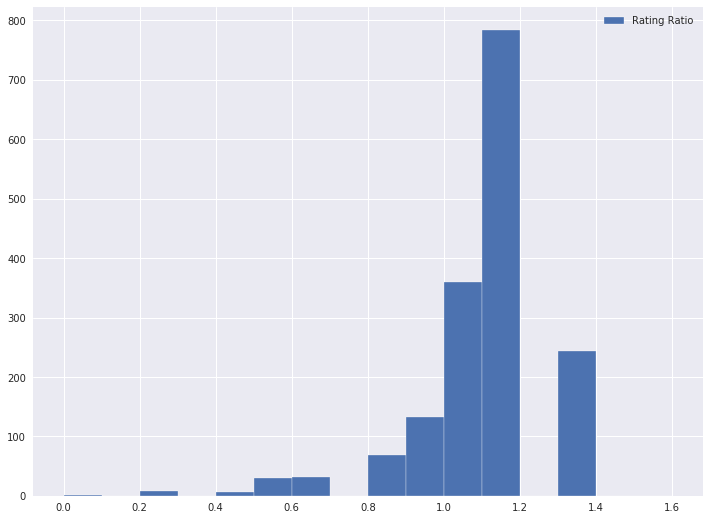

In [278]:
# Rating Ratio
x = df_clean.rating_ratio
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(x,bins=16, range=(0,1.6), label='Rating Ratio', edgecolor='white')
ax.legend();

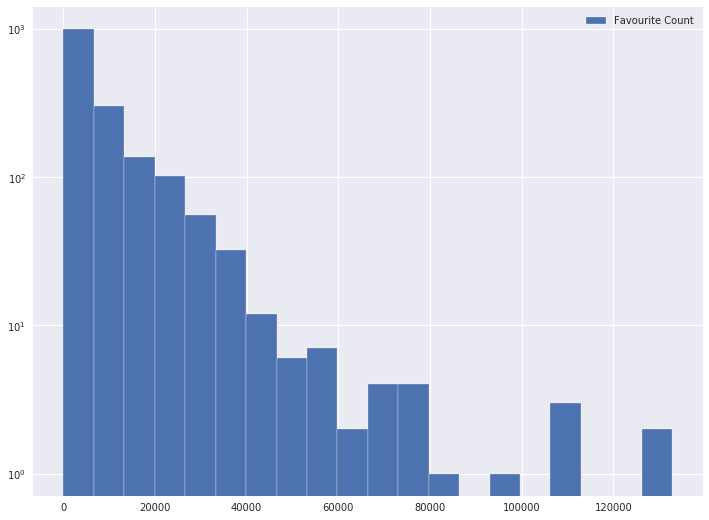

In [279]:
plt.hist(df_clean.favourite_count, bins=20, log=True, label='Favourite Count', edgecolor='white')
plt.legend();

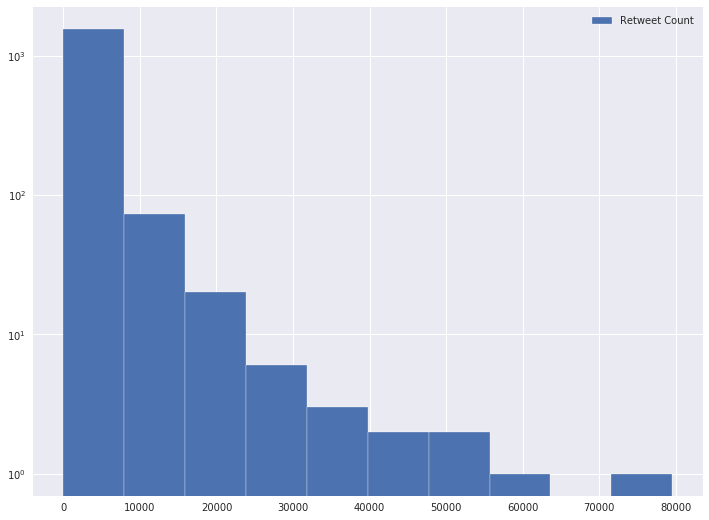

In [280]:
plt.hist(df_clean.retweet_count, log=True, label='Retweet Count', edgecolor='white')
plt.legend();

In [281]:
df_clean.name.value_counts().head(10)

None       310
Charlie     10
Cooper       8
Tucker       7
Winston      7
Oliver       6
Penny        6
Sadie        6
Jax          5
Rusty        5
Name: name, dtype: int64

In [282]:
df_clean.breed.value_counts().head(10)

Golden Retriever      156
Labrador Retriever    106
Pembroke               94
Chihuahua              90
Pug                    62
Toy Poodle             50
Chow                   48
Samoyed                42
Pomeranian             41
Malamute               33
Name: breed, dtype: int64

In [283]:
df_clean.source.value_counts()

Twitter for iPhone    1635
Twitter Web Client      22
TweetDeck                9
Name: source, dtype: int64

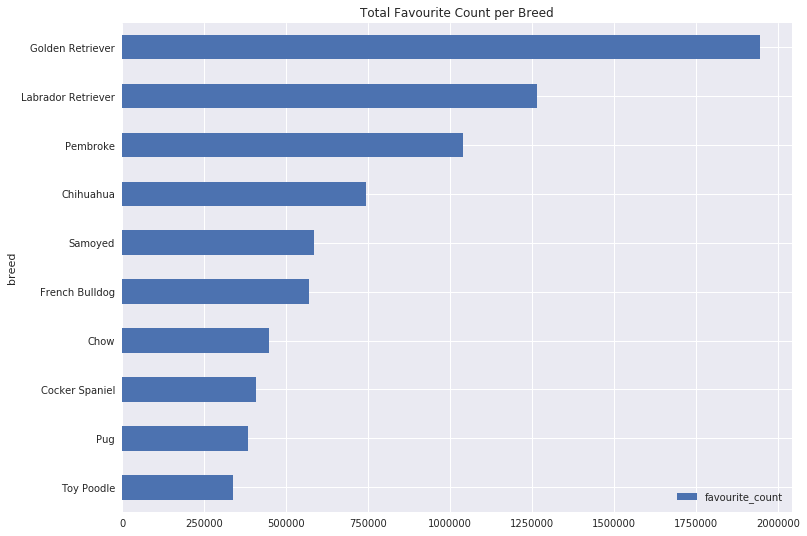

In [284]:
df_clean[['breed', 'favourite_count']].groupby(['breed']).sum().sort_values('favourite_count', ascending=False).head(10).sort_values('favourite_count', ascending=True).plot(kind='barh', title='Total Favourite Count per Breed');

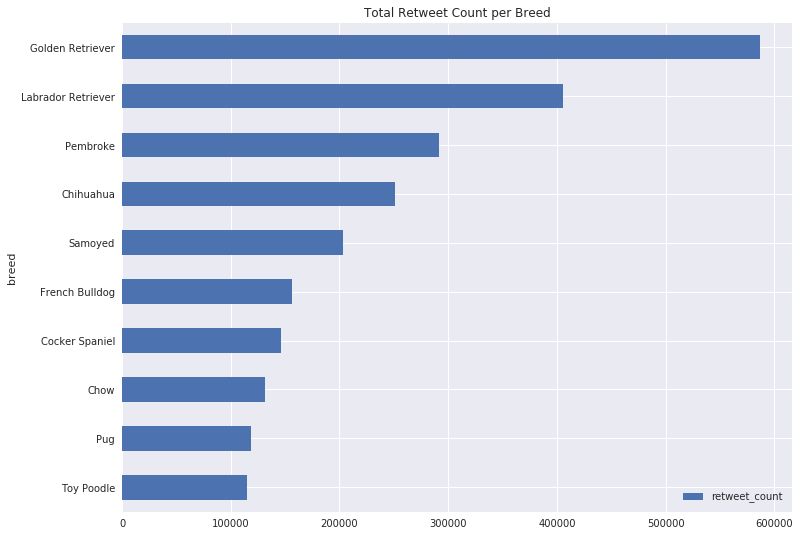

In [285]:
# most popular (by retweet count)
df_clean[['breed', 'retweet_count']].groupby(['breed']).sum().sort_values('retweet_count', ascending=False).head(10).sort_values('retweet_count', ascending=True).plot(kind='barh', title='Total Retweet Count per Breed');

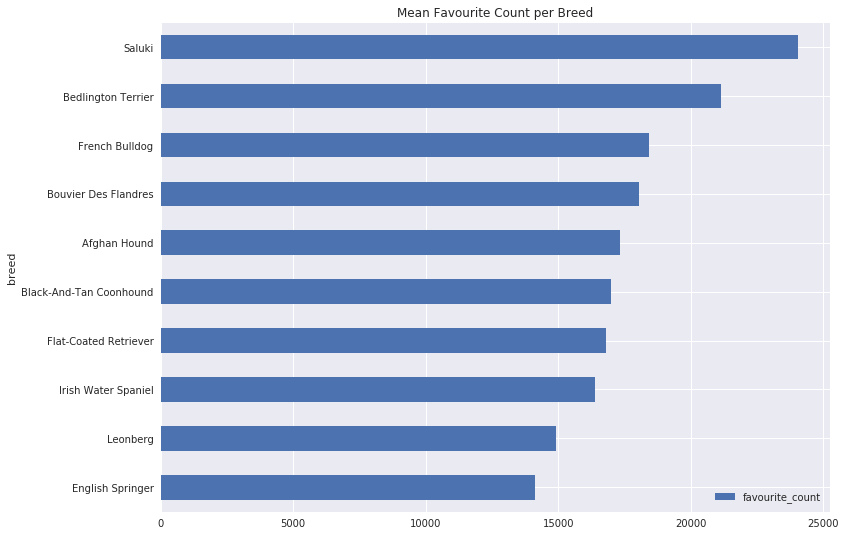

In [286]:
df_clean[['breed', 'favourite_count']].groupby(['breed']).mean().sort_values('favourite_count', ascending=False).head(10).sort_values('favourite_count', ascending=True).plot(kind='barh', title='Mean Favourite Count per Breed');

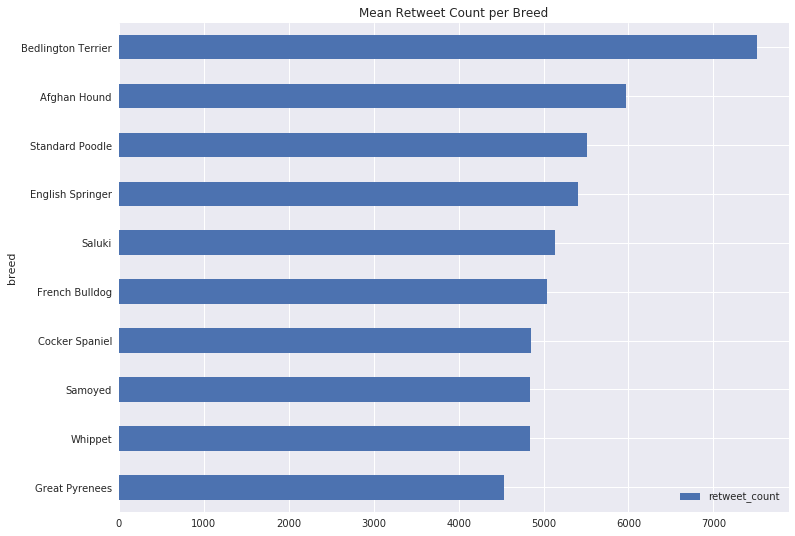

In [287]:
df_clean[['breed', 'retweet_count']].groupby(['breed']).mean().sort_values('retweet_count', ascending=False).head(10).sort_values('retweet_count', ascending=True).plot(kind='barh', title='Mean Retweet Count per Breed');

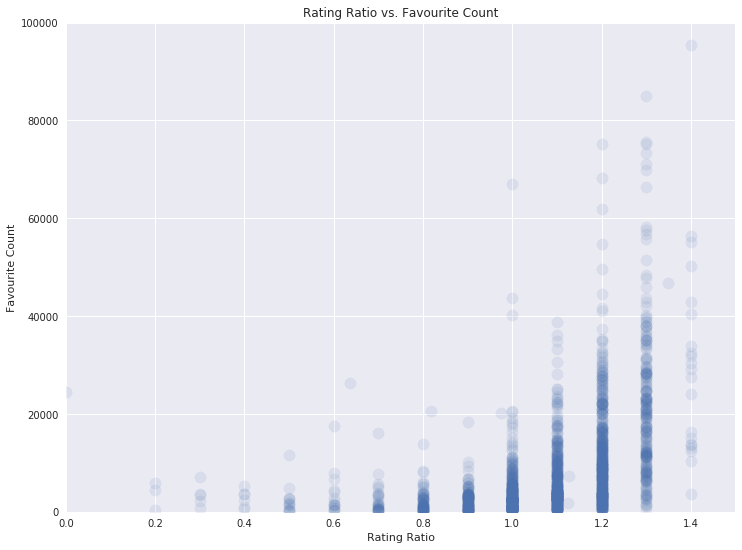

In [288]:
plt.scatter(x=df_clean.rating_ratio, y=df_clean.favourite_count, alpha=.1, s=128)
plt.axis([0.0,1.5, 0.0,100000])
ax = plt.gca()
ax.set_autoscale_on(False)
ax.set(title = 'Rating Ratio vs. Favourite Count',
       ylabel='Favourite Count',
       xlabel='Rating Ratio');

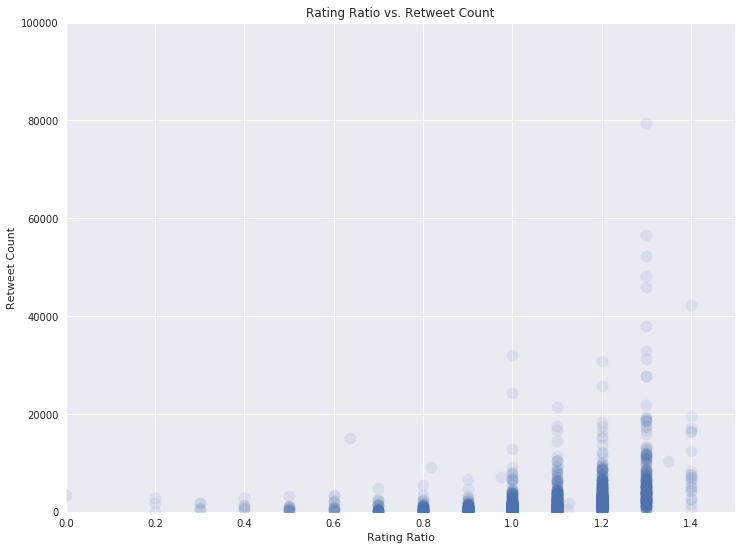

In [289]:
plt.scatter(x=df_clean.rating_ratio, y=df_clean.retweet_count, alpha=.1, s=128)
plt.axis([0.0,1.5, 0.0,100000])
ax = plt.gca()
ax.set_autoscale_on(False)
ax.set(title = 'Rating Ratio vs. Retweet Count',
       ylabel='Retweet Count',
       xlabel='Rating Ratio');

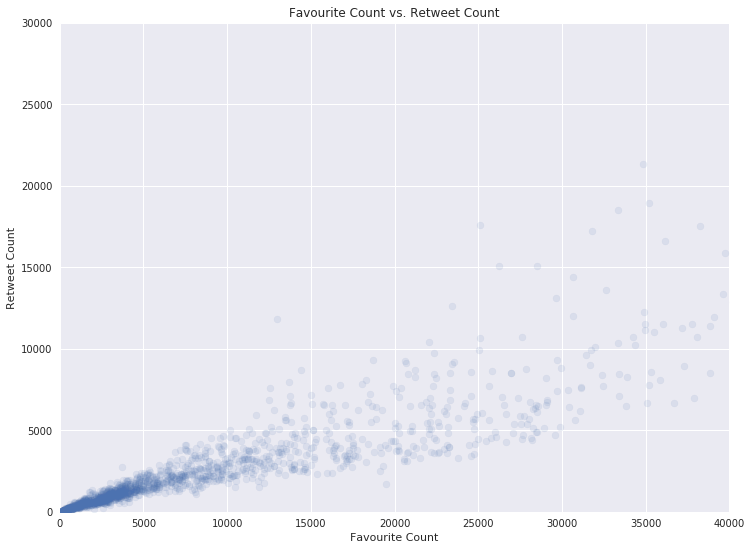

In [290]:
plt.scatter(x=df_clean.favourite_count, y=df_clean.retweet_count, alpha=.1)
plt.axis([0.0,40000, 0.0,30000])
ax = plt.gca()
ax.set_autoscale_on(False)
ax.set(title = 'Favourite Count vs. Retweet Count',
       ylabel='Retweet Count',
       xlabel='Favourite Count');

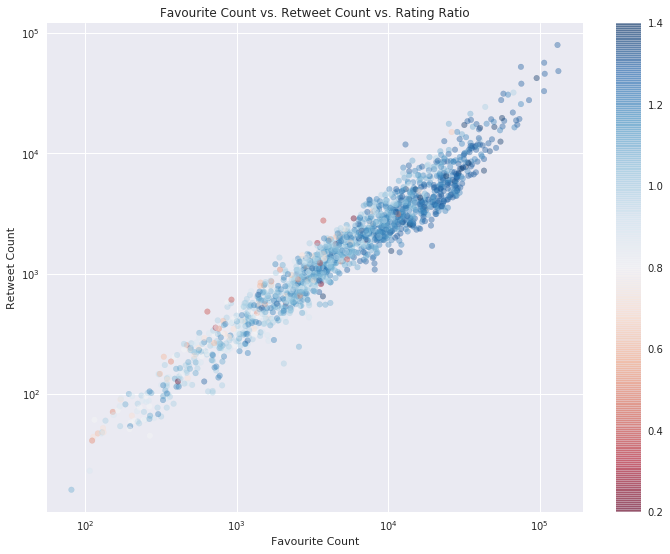

In [291]:
x = df_clean.query("rating_ratio < 3 & rating_ratio > 0").favourite_count
y = df_clean.query("rating_ratio < 3 & rating_ratio > 0").retweet_count
c = df_clean.query("rating_ratio < 3 & rating_ratio > 0").rating_ratio
s = 32

fig = plt.figure()
ax = fig.add_subplot(111)
sctr = ax.scatter(x, y, c=c, s=s, alpha=.4, cmap=plt.cm.get_cmap('RdBu'))
ax.set_yscale('log')
ax.set_xscale('log')
plt.colorbar(sctr, ax=ax)
ax.set(title = 'Favourite Count vs. Retweet Count vs. Rating Ratio',
       ylabel='Retweet Count',
       xlabel='Favourite Count');

In [292]:
df_clean[['retweet_count', 'favourite_count', 'rating_ratio']].corr()

,retweet_count,favourite_count,rating_ratio
retweet_count,1.000000,0.913284,0.300868
favourite_count,0.913284,1.000000,0.406210
rating_ratio,0.300868,0.406210,1.000000


In [293]:
df_clean.query('retweet_count == retweet_count.max()')

,tweet_id,name,breed,stage,rating_numerator,rating_denominator,favourite_count,retweet_count,timestamp,source,text,expanded_urls,jpg_url,img_num,rating_ratio
1039,744234799360020481,None,Labrador Retriever,Doggo,13.0,10.0,131075,79515,2016-06-18 18:26:18,Twitter for iPhone,Here's a doggo realizing you can stand in a po...,https://twitter.com/dog_rates/status/744234799...,https://pbs.twimg.com/ext_tw_video_thumb/74423...,1,1.3


In [294]:
df_clean.query('favourite_count == favourite_count.max()')

,tweet_id,name,breed,stage,rating_numerator,rating_denominator,favourite_count,retweet_count,timestamp,source,text,expanded_urls,jpg_url,img_num,rating_ratio
413,822872901745569793,Tucker,Lakeland Terrier,Puppo,13.0,10.0,132810,48265,2017-01-21 18:26:02,Twitter for iPhone,Here's a super supportive puppo participating ...,https://twitter.com/dog_rates/status/822872901...,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg,1,1.3


In [295]:
df_clean.query('rating_ratio == rating_ratio.max()')

,tweet_id,name,breed,stage,rating_numerator,rating_denominator,favourite_count,retweet_count,timestamp,source,text,expanded_urls,jpg_url,img_num,rating_ratio
516,810984652412424192,Bungalo,Golden Retriever,None,24.0,7.0,5927,1655,2016-12-19 23:06:23,Twitter for iPhone,Meet Sam. She smiles 24/7 &amp; secretly aspir...,"https://www.gofundme.com/sams-smile,https://tw...",https://pbs.twimg.com/media/C0EyPZbXAAAceSc.jpg,1,3.428571
